In [4]:
!PIP install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 3.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('student_success_dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

<Axes: xlabel='Target', ylabel='count'>

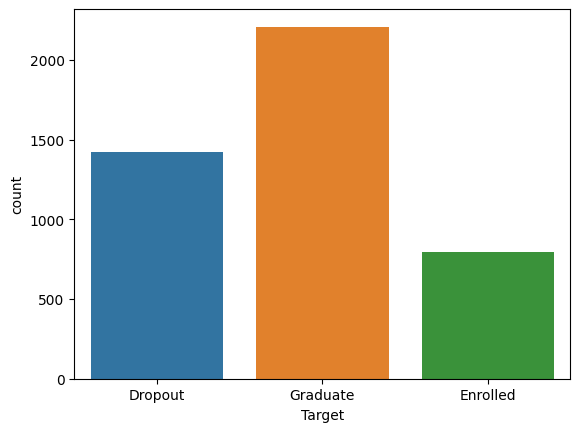

In [18]:
sns.countplot(df, x=df['Target'], hue=df['Target'])

<Axes: xlabel='Course', ylabel='count'>

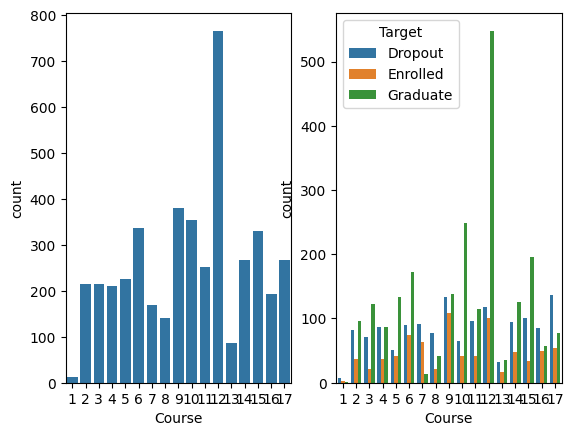

In [32]:
fig, ax =plt.subplots(1,2)
sns.countplot(df, x=df['Course'], ax=ax[0])
sns.countplot(df, x=df['Course'], hue=df['Target'], ax=ax[1])

<Axes: xlabel='Gender', ylabel='count'>

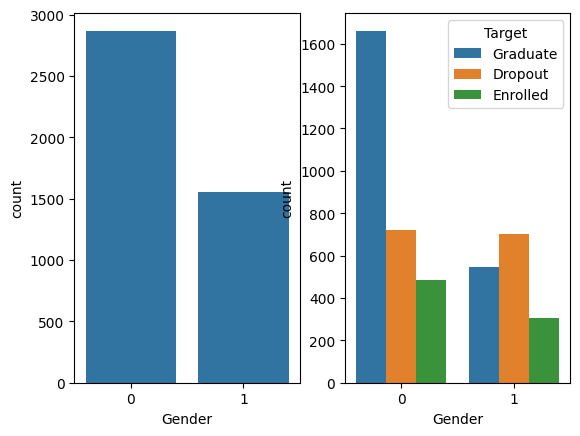

In [34]:
fig, ax =plt.subplots(1,2)
sns.countplot(df, x=df['Gender'], ax=ax[0])
sns.countplot(df, x=df['Gender'], hue=df['Target'], ax=ax[1])

<Axes: xlabel="Mother's occupation", ylabel='count'>

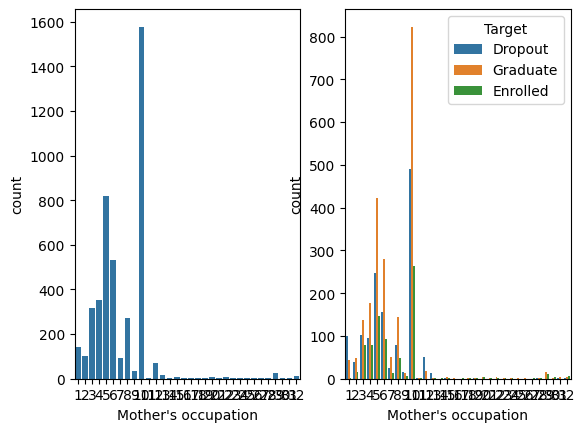

In [36]:
fig, ax =plt.subplots(1,2)
sns.countplot(df, x=df["Mother's occupation"], ax=ax[0])
sns.countplot(df, x=df["Mother's occupation"], hue=df['Target'], ax=ax[1])

<Axes: xlabel='Tuition fees up to date', ylabel='count'>

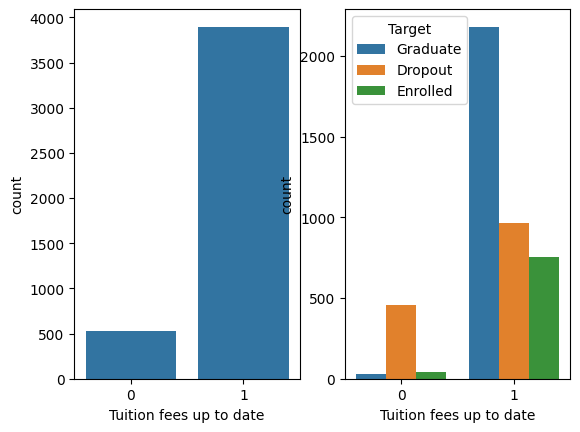

In [39]:
fig, ax =plt.subplots(1,2)
sns.countplot(df, x=df["Tuition fees up to date"], ax=ax[0])
sns.countplot(df, x=df["Tuition fees up to date"], hue=df['Target'], ax=ax[1])

<Axes: xlabel='Unemployment rate', ylabel='Age at enrollment'>

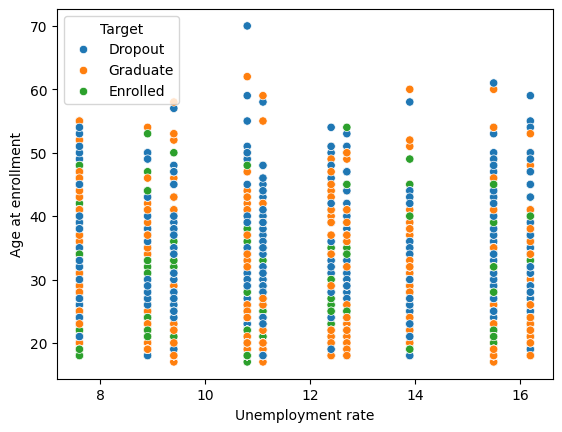

In [20]:
sns.scatterplot(data=df, x="Unemployment rate", y="Age at enrollment", hue="Target")

In [21]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [6]:
numerical_features = [
    'Application order',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP']
numerical_data = df[numerical_features]

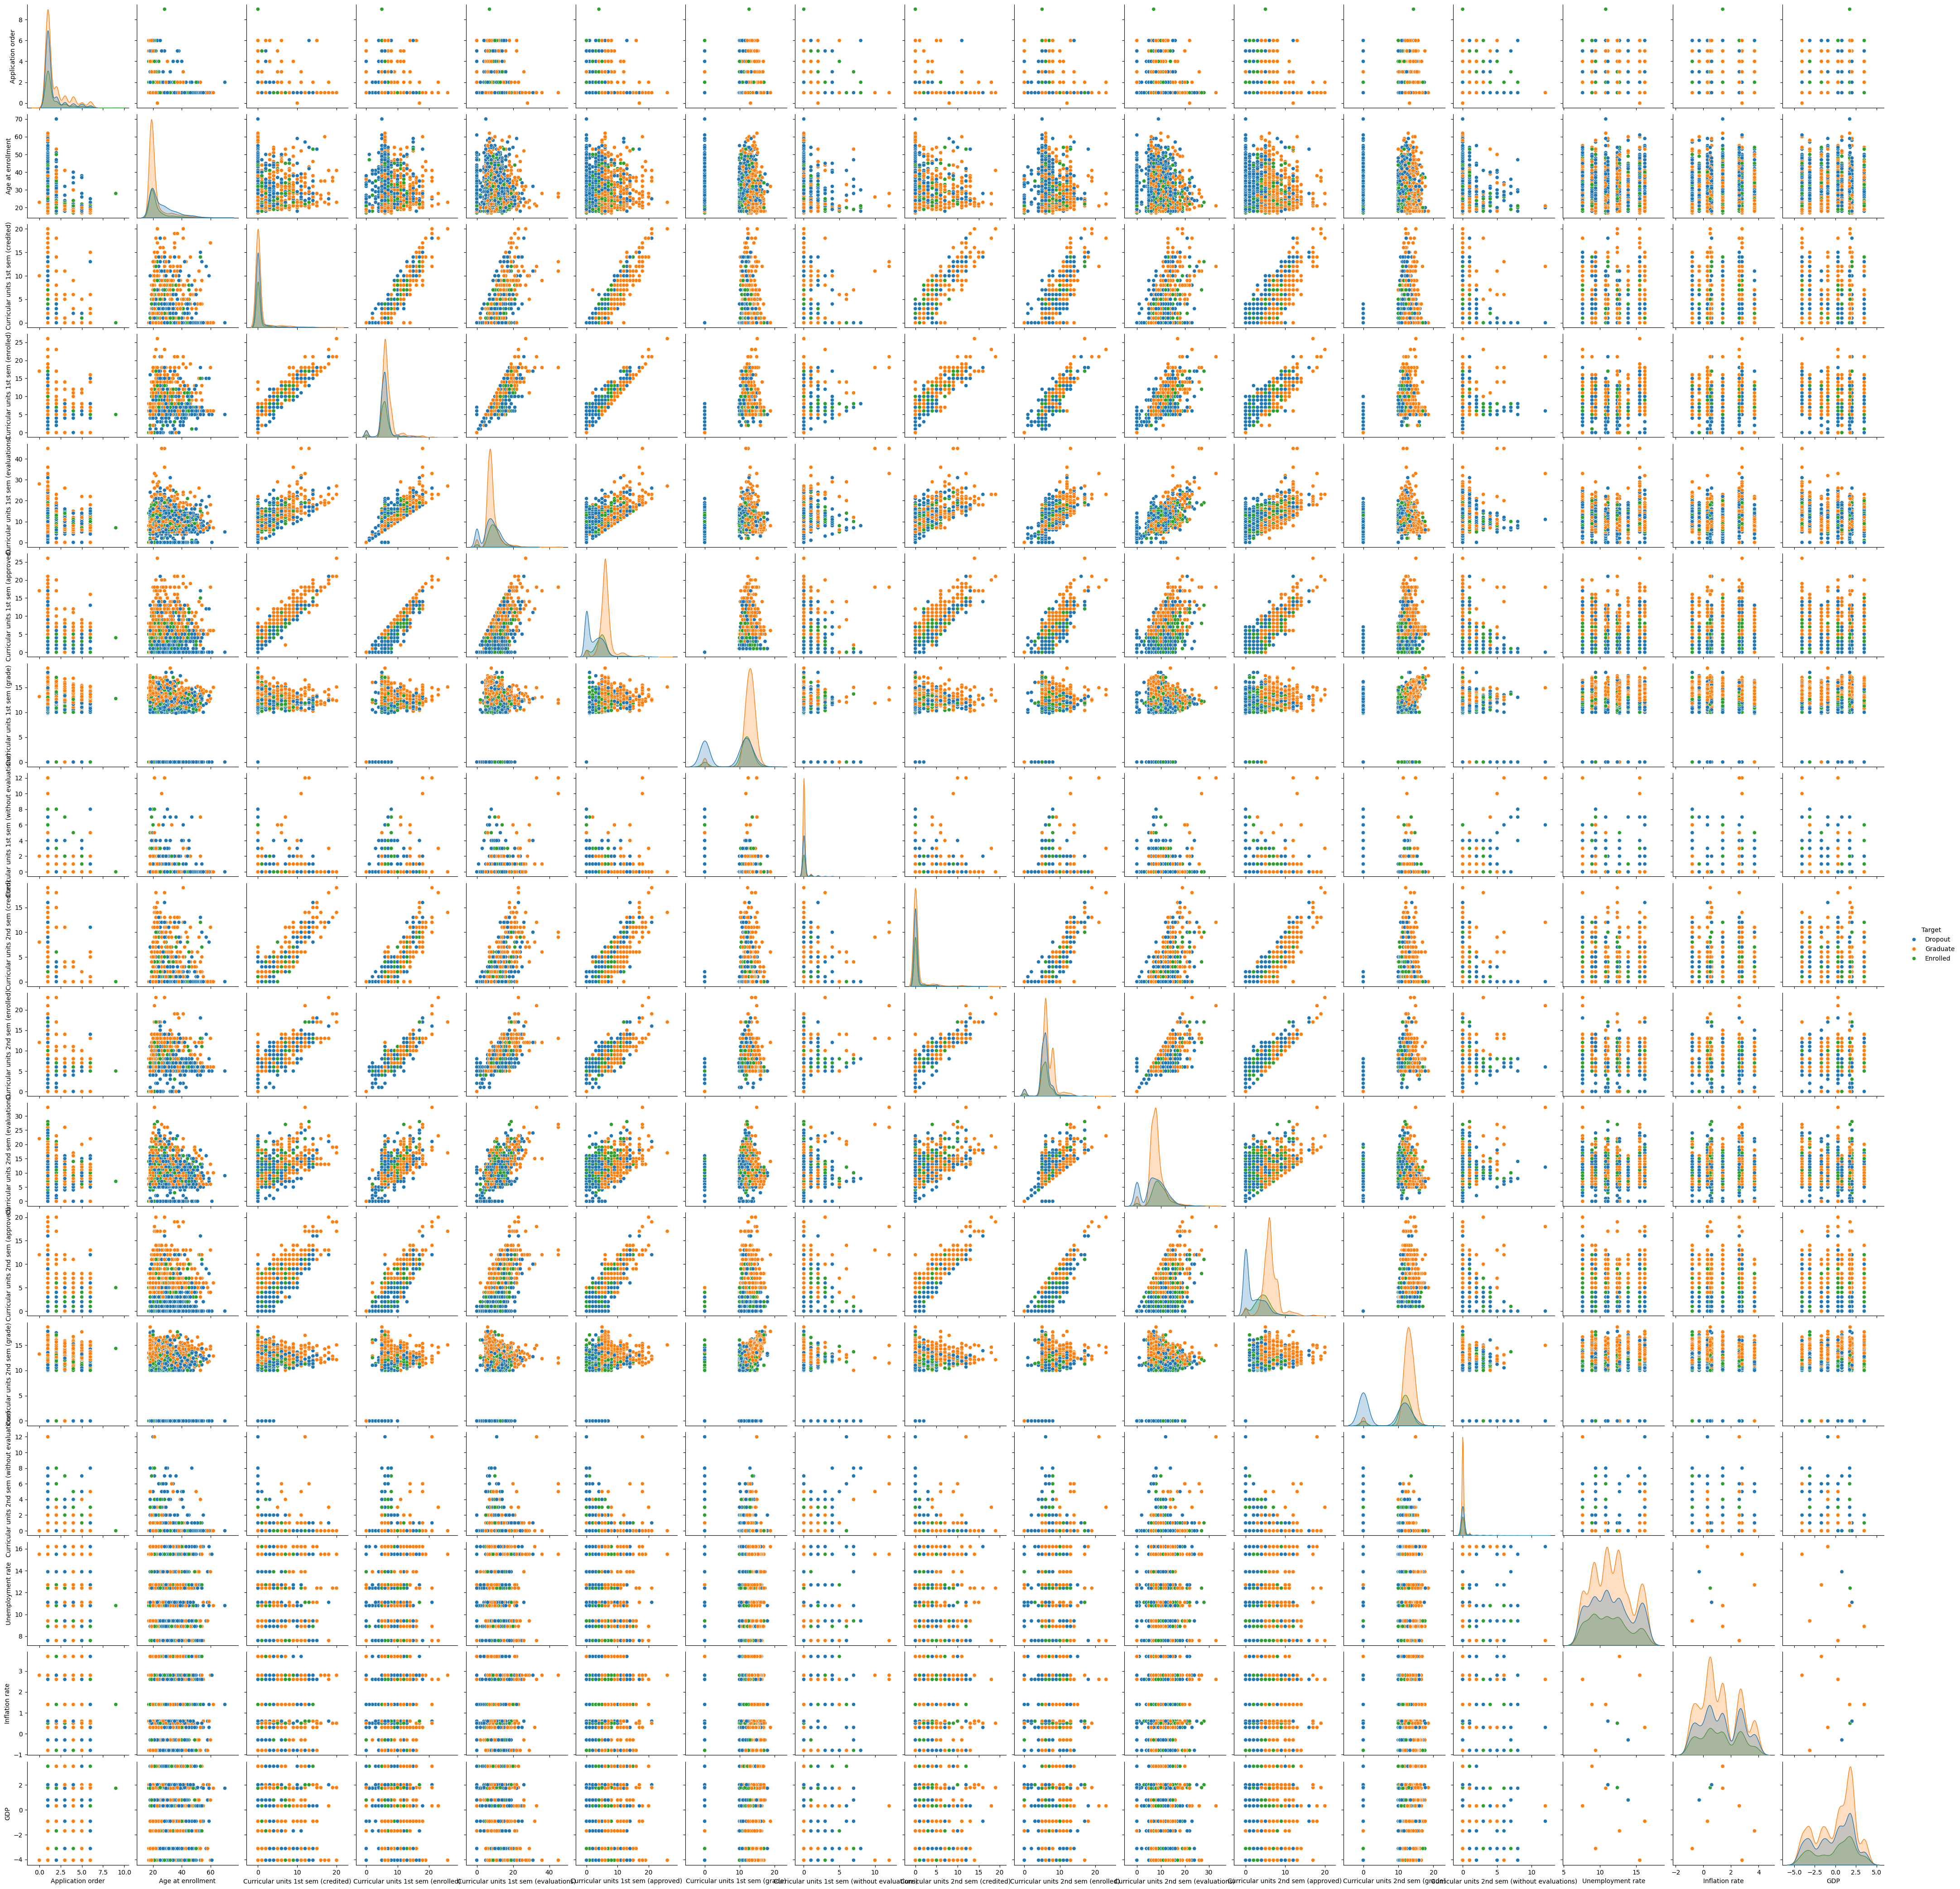

In [7]:
pair_plot_features = numerical_features.copy()
pair_plot_features.append('Target')
numerical_data_plus_target = df[pair_plot_features]
sns.pairplot(numerical_data_plus_target, hue='Target')

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Target'])
target = df['Target']

X_numerical = numerical_data
y = df['Target']

X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear', random_state=42)
scores = cross_val_score(clf, X_numerical, y, cv=5)

In [10]:
scores

array([0.75254237, 0.74011299, 0.73333333, 0.74576271, 0.72171946])

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

n_estimators = 300
max_leaf_nodes = 15
random_state = 42

# Creating the pipeline with the scaler transformation and logistic regression classifier
numerical_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regresion', RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state))
])

In [53]:
# Import the new functions we need
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Seperating categorical data and features
categorical_features = np.setdiff1d(X.columns, numerical_features)
categorical_features
categorical_data = df[categorical_features]

categorical_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown="ignore")),
    ('logistic_regresion', RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state))
])

In [54]:
# Tranformer of numerical data
numerical_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ])

# Transformer of categorical data
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Pipeline using all features
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state)
)
    ]
)

pipe


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Application order',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular unit...
       'Debtor', 'Displaced', 'Educational special needs',
       "Father's occupation", "Father's qualification", 'Gender',
       'International', 'Marital status', "Mother's occupation",
       "Mother's qualification", 'Nacionality', 'Previous qualification',
       'Scholarship holder', 'Tuition fees up to date'], dtype=object))])),
                ('classifier',
                 RandomForestClassifier(max_leaf_nodes=15, n_estimators=300,
                                        random_state=42))])

In [55]:
num_pipe_score = cross_validate(numerical_pipe, numerical_data, target, cv=10)['test_score']
cat_pipe_score = cross_validate(categorical_pipe, categorical_data, target, cv=10)['test_score']
pipe_score = cross_validate(pipe, df, target, cv=10)['test_score']

print('num_pipe_score', num_pipe_score.mean())
print('cat_pipe_score', cat_pipe_score.mean())
print('pipe_score', pipe_score.mean())

print(f'The classifier using all the data is better than the one using only numerical data {(pipe_score >= num_pipe_score).sum()} times')
print(f'The classifier using all the data is better than the one using only categorical data {(pipe_score >= cat_pipe_score).sum()} times')

num_pipe_score 0.7255891035004035
cat_pipe_score 0.6277131446431671
pipe_score 0.727169238940584
The classifier using all the data is better than the one using only numerical data 6 times
The classifier using all the data is better than the one using only categorical data 10 times


[[241   0  75]
 [ 48   0 103]
 [ 19   0 399]]


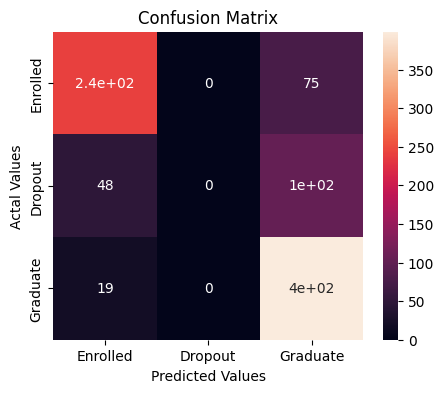

In [45]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['Enrolled','Dropout','Graduate'],
                     columns = ['Enrolled','Dropout','Graduate'])
    #Plotting the confusion matrix
    print(cm)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

plot_confusion_matrix(pipe, X, y)

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("recall_score    : mesure du nombre de vrai positifs                   ", recall_score(y_test, y_pred, average=None))
print("precision_score : mesure de la minimisation du nombre de faux positifs", precision_score(y_test, y_pred, average=None))
print("f1_score        : mesure complète du modèle                           ", f1_score(y_test, y_pred, average=None))

recall_score    : mesure du nombre de vrai positifs                    [0.76265823 0.         0.95454545]
precision_score : mesure de la minimisation du nombre de faux positifs [0.78246753 0.         0.6915078 ]
f1_score        : mesure complète du modèle                            [0.7724359  0.         0.80201005]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
def generate_pipeline(model=RandomForestClassifier, n_estimators=200, max_leaf_nodes=10, random_state=42):
    # Tranformer of numerical data
    numerical_transformer = Pipeline([
        ('scaler', StandardScaler()),
        ])

    # Transformer of categorical data
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
    )

    # Preprocessor transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transformer, numerical_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    # Pipeline using all features
    pipe = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("classifier", model(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state)
    )
        ]
    )

    return pipe

>2, train: 0.568, test: 0.572
>3, train: 0.741, test: 0.714
>4, train: 0.753, test: 0.743
>5, train: 0.757, test: 0.746
>6, train: 0.761, test: 0.750
>7, train: 0.765, test: 0.755
>8, train: 0.768, test: 0.755
>9, train: 0.768, test: 0.758
>10, train: 0.767, test: 0.758
>11, train: 0.769, test: 0.759
>12, train: 0.770, test: 0.760
>13, train: 0.771, test: 0.760
>14, train: 0.773, test: 0.759
>15, train: 0.772, test: 0.766
>16, train: 0.773, test: 0.765
>17, train: 0.775, test: 0.766
>18, train: 0.777, test: 0.767
>19, train: 0.779, test: 0.765
>20, train: 0.780, test: 0.764


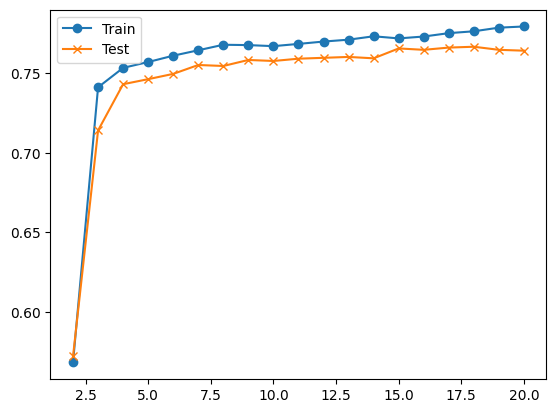

In [73]:
def plot_f1_score():



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # define lists to collect scores
    train_scores, test_scores = [], []
    # define the tree depths to evaluate
    values = [i for i in range(2, 21)]
    # evaluate a decision tree for each depth
    for i in values:
        # configure the model
        model = generate_pipeline(max_leaf_nodes=i, n_estimators=500)
        # fit model on the training dataset
        model.fit(X_train, y_train)
        # evaluate on the train dataset
        train_yhat = model.predict(X_train)
        train_acc = f1_score(y_train, train_yhat, average=None)[0]
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = model.predict(X_test)
        test_acc = f1_score(y_test, test_yhat, average=None)[0]
        test_scores.append(test_acc)
        # summarize progress
        print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
        # plot of train and test scores vs tree depth
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-x', label='Test')
    plt.legend()
    plt.show()

plot_f1_score()